# 1.5.9 Feature Matching

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [23]:
img1 = cv2.imread('sim0.png',0) # queryImage
img2 = cv2.imread('sim1.png',0) # trainImage

In [24]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

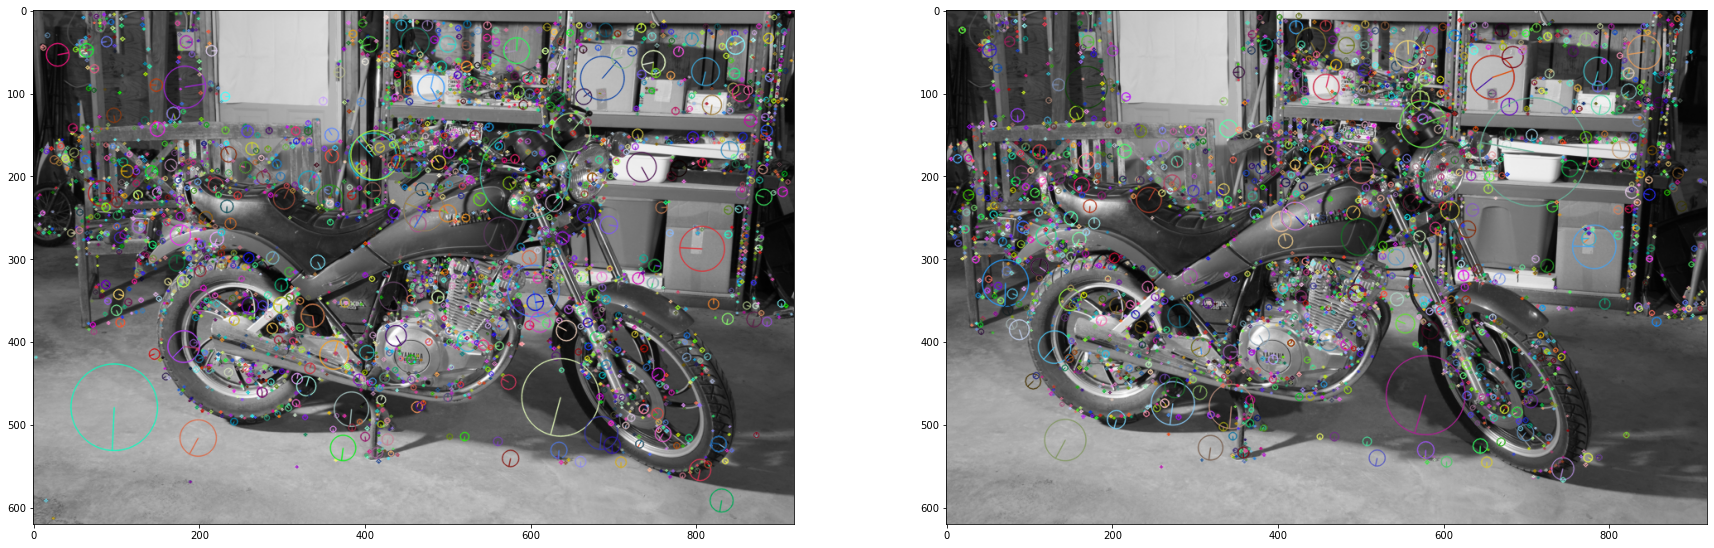

In [25]:
img1v=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v=cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30,20))
plt.subplot(1,2,1), plt.imshow(img1v)
plt.subplot(1,2,2), plt.imshow(img2v)
plt.show()

In [26]:
cv2.imwrite('out.png',img1v)

True

In [27]:
# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.knnMatch(des1,des2, k=2)
# Sort them in the order of their distance.
good = []

In [28]:
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [29]:
print(good)

[[<DMatch 000001E239E4F350>], [<DMatch 000001E239E4F2F0>], [<DMatch 000001E239E4F290>], [<DMatch 000001E239E4F270>], [<DMatch 000001E239E4F3D0>], [<DMatch 000001E239E4F450>], [<DMatch 000001E239E4F610>], [<DMatch 000001E239E4F7D0>], [<DMatch 000001E239E4FA10>], [<DMatch 000001E239E4FE10>], [<DMatch 000001E239E4FE90>], [<DMatch 000001E239E4FF90>], [<DMatch 000001E239E5D210>], [<DMatch 000001E239E5D3D0>], [<DMatch 000001E239E5D510>], [<DMatch 000001E239E5D5D0>], [<DMatch 000001E239E5D650>], [<DMatch 000001E239E5D710>], [<DMatch 000001E239E5D7D0>], [<DMatch 000001E239E5D810>], [<DMatch 000001E239E5D850>], [<DMatch 000001E239E5D910>], [<DMatch 000001E239E5D990>], [<DMatch 000001E239E5DB10>], [<DMatch 000001E239E5DB90>], [<DMatch 000001E239E5DBD0>], [<DMatch 000001E239E5DC10>], [<DMatch 000001E239E5DCD0>], [<DMatch 000001E239E5DD50>], [<DMatch 000001E239E5DD90>], [<DMatch 000001E239E5DDD0>], [<DMatch 000001E239E5DE50>], [<DMatch 000001E239E5DE90>], [<DMatch 000001E239E5DF10>], [<DMatch 0000

In [31]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

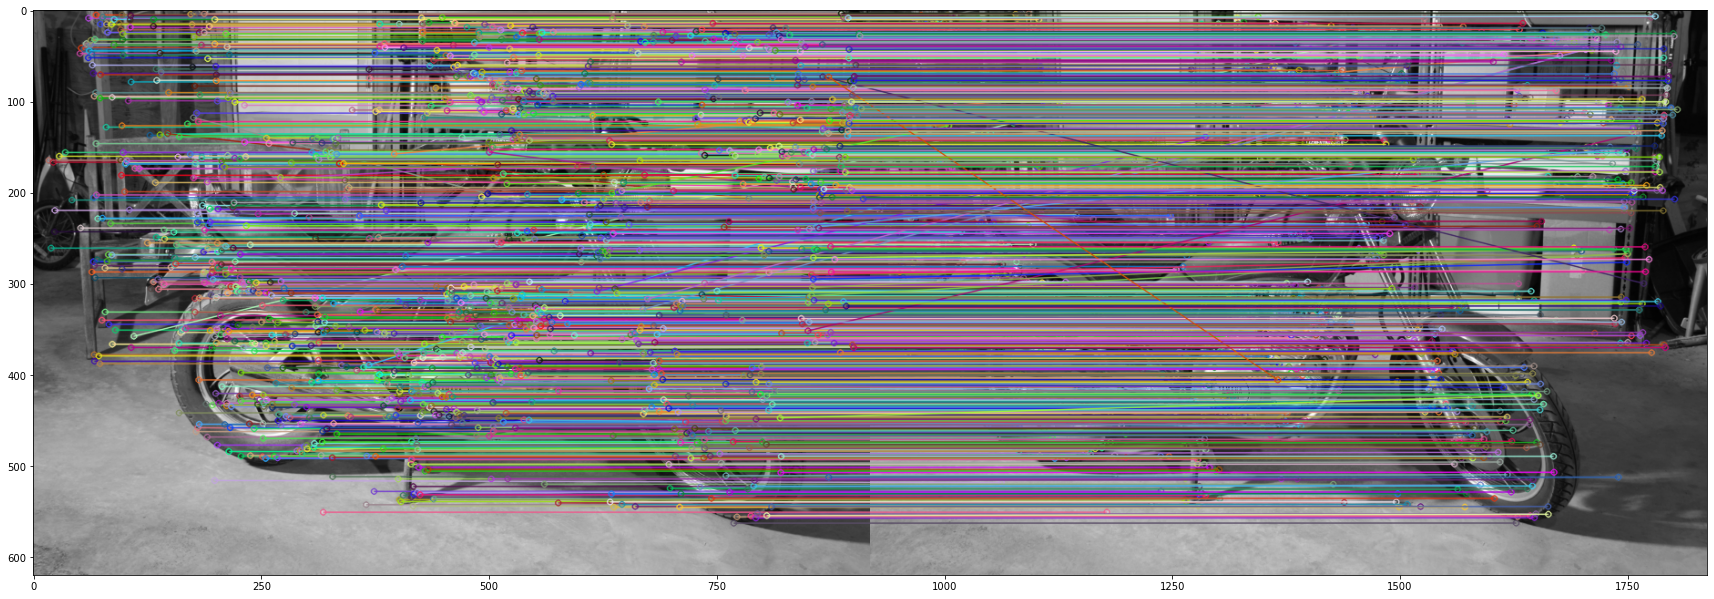

(<matplotlib.image.AxesImage at 0x1e23a1bb610>, None)

In [32]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()

In [33]:
cv2.imwrite('out2.png',img3)

True